In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import nltk     
import re
import string
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import graphviz 
from sklearn import tree
from sklearn import metrics
from wordcloud import WordCloud
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import time

DATA_DIR = os.path.join( '..', 'data')

PROCESSED_DATA_DIR = os.path.join(DATA_DIR, 'processed')

In [2]:
# #read sms_test and sms_train data and sms_val data
# X_test = pd.read_csv(os.path.join(PROCESSED_DATA_DIR, 'sms_test.csv'))
# y_test=X_test['Label']
# X_test.drop(['Label','SMS'],axis=1,inplace=True)
# X_train = pd.read_csv(os.path.join(PROCESSED_DATA_DIR, 'sms_train.csv'))
# y_train=X_train['Label']
# X_train.drop(['Label','SMS'],axis=1,inplace=True)
# X_val = pd.read_csv(os.path.join(PROCESSED_DATA_DIR, 'sms_val.csv'))
# y_val=X_val['Label']
# X_val.drop(['Label','SMS'],axis=1,inplace=True)

In [3]:
#read sms_test and sms_train data and sms_val data
X_test = pd.read_csv(os.path.join(PROCESSED_DATA_DIR, 'sms_test.csv'))
y_test=X_test['Label']
X_test.drop(['Label'],axis=1,inplace=True)
X_train = pd.read_csv(os.path.join(PROCESSED_DATA_DIR, 'sms_train.csv'))
y_train=X_train['Label']
X_train.drop(['Label'],axis=1,inplace=True)
X_val = pd.read_csv(os.path.join(PROCESSED_DATA_DIR, 'sms_val.csv'))
y_val=X_val['Label']
X_val.drop(['Label'],axis=1,inplace=True)

In [4]:

# # Inicializar y entrenar un vectorizador TF-IDF
# vectorizer = TfidfVectorizer(stop_words='english')
# X_train = vectorizer.fit_transform(X_train['SMS'])
# X_test = vectorizer.transform(X_test['SMS'])

In [5]:
def evaluate_model(model,X_train,X_test,y_train,y_test):
    # Registra el tiempo actual antes de ejecutar el código
    inicio = time.time()



    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Obtener las probabilidades para el conjunto de prueba y el conjunto de entrenamiento
    y_probs_train = model.predict_proba(X_train)[:, 1]
    y_probs_test = model.predict_proba(X_test)[:, 1]

    # Calcular la curva ROC y el AUC para ambos conjuntos
    fpr_train, tpr_train, _ = roc_curve(y_train, y_probs_train)
    roc_auc_train = roc_auc_score(y_train, y_probs_train)

    fpr_test, tpr_test, _ = roc_curve(y_test, y_probs_test)
    roc_auc_test = roc_auc_score(y_test, y_probs_test)

    # Mostrar resultados finales
    f1 = f1_score(y_test, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)


    # Registra el tiempo después de que el proceso finalice
    fin = time.time()
    tiempo_transcurrido_segundos = fin - inicio
    print(f"El proceso tardó aproximadamente {tiempo_transcurrido_segundos:.2f} segundos.")
    # Mostrar la curva ROC para el conjunto de entrenamiento y prueba
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
    plt.plot(fpr_test, tpr_test, color='orange', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    # Mostrar resultados
    print(f'f1_score: {f1_score}')
    print('Confusion Matrix:')
    print(conf_matrix)
    print('Classification Report:')
    print(classification_rep)
    #print the time of training with time os library
    print("Tiempo de entrenamiento: %s segundos" % (time.time() - inicio))

    
    return model,f1






# Regresion Logistica

El proceso tardó aproximadamente 0.06 segundos.


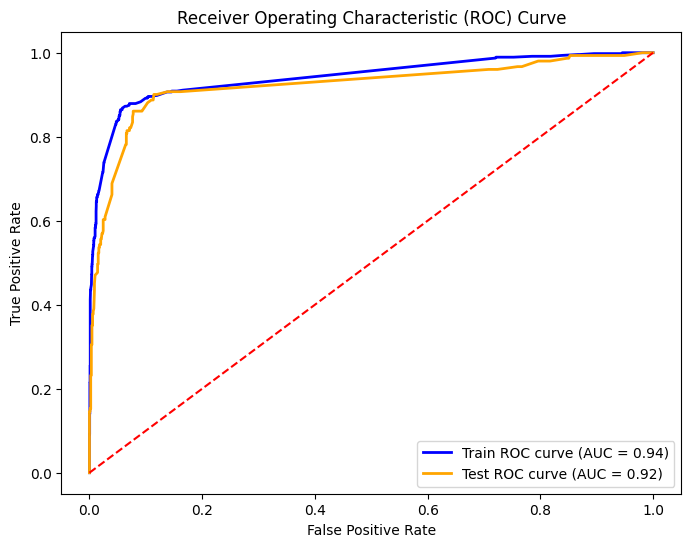

f1_score: <function f1_score at 0x000001B267715E40>
Confusion Matrix:
[[880  22]
 [ 61  90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.95       902
           1       0.80      0.60      0.68       151

    accuracy                           0.92      1053
   macro avg       0.87      0.79      0.82      1053
weighted avg       0.92      0.92      0.92      1053

Tiempo de entrenamiento: 0.31307458877563477 segundos


In [6]:

log_reg,f1_log_reg=evaluate_model(LogisticRegression(),X_train,X_test,y_train,y_test)

# Random Forest

El proceso tardó aproximadamente 0.57 segundos.


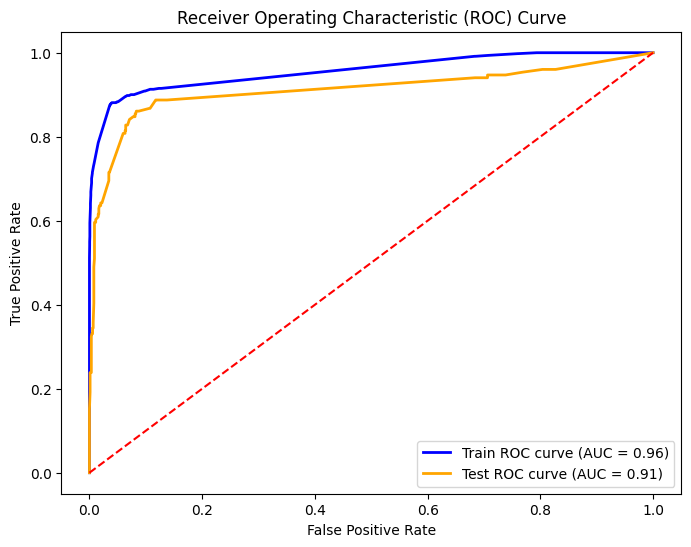

f1_score: <function f1_score at 0x000001B267715E40>
Confusion Matrix:
[[871  31]
 [ 45 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       902
           1       0.77      0.70      0.74       151

    accuracy                           0.93      1053
   macro avg       0.86      0.83      0.85      1053
weighted avg       0.93      0.93      0.93      1053

Tiempo de entrenamiento: 0.8052711486816406 segundos


In [7]:

rand_for,f1_rand_for=evaluate_model(RandomForestClassifier(),X_train,X_test,y_train,y_test)

# Support Vector Machine

El proceso tardó aproximadamente 1.60 segundos.


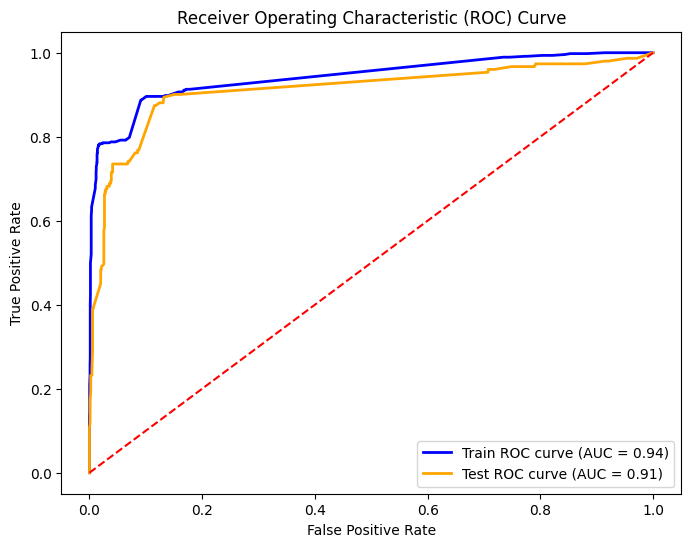

f1_score: <function f1_score at 0x000001B267715E40>
Confusion Matrix:
[[876  26]
 [ 49 102]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       902
           1       0.80      0.68      0.73       151

    accuracy                           0.93      1053
   macro avg       0.87      0.82      0.85      1053
weighted avg       0.93      0.93      0.93      1053

Tiempo de entrenamiento: 1.8148093223571777 segundos


In [8]:
sup_vec, f1_sup_vec = evaluate_model(SVC(probability=True), X_train, X_test, y_train, y_test)


# XG Boost

El proceso tardó aproximadamente 0.21 segundos.


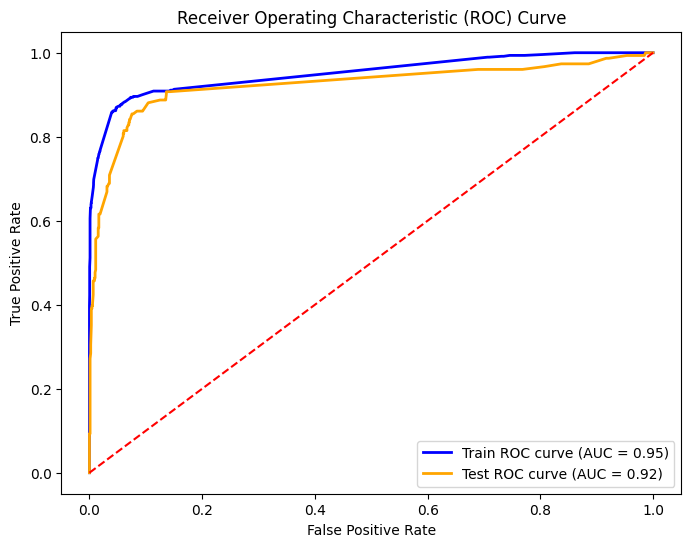

f1_score: <function f1_score at 0x000001B267715E40>
Confusion Matrix:
[[873  29]
 [ 48 103]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       902
           1       0.78      0.68      0.73       151

    accuracy                           0.93      1053
   macro avg       0.86      0.82      0.84      1053
weighted avg       0.92      0.93      0.92      1053

Tiempo de entrenamiento: 0.43778491020202637 segundos


In [9]:
xg_boost,f1_xg_boost=evaluate_model(XGBClassifier(),X_train,X_test,y_train,y_test)

In [10]:
#pass xgboost model to pkl file
import pickle
# save the model to disk
filename = 'xg_boost_model.pkl'
pickle.dump(xg_boost, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_val, y_val)
print(result)


0.9263657957244655


# Multinominal Naive Bayes

El proceso tardó aproximadamente 0.04 segundos.


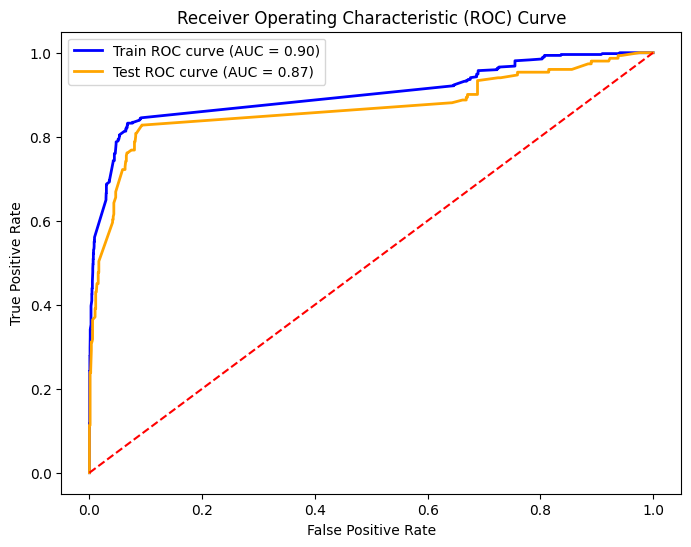

f1_score: <function f1_score at 0x000001B267715E40>
Confusion Matrix:
[[849  53]
 [ 42 109]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       902
           1       0.67      0.72      0.70       151

    accuracy                           0.91      1053
   macro avg       0.81      0.83      0.82      1053
weighted avg       0.91      0.91      0.91      1053

Tiempo de entrenamiento: 0.285597562789917 segundos


In [11]:
mul_nom,f1_mul_nom=evaluate_model(MultinomialNB(),X_train,X_test,y_train,y_test)

# Decision Tree


El proceso tardó aproximadamente 0.04 segundos.


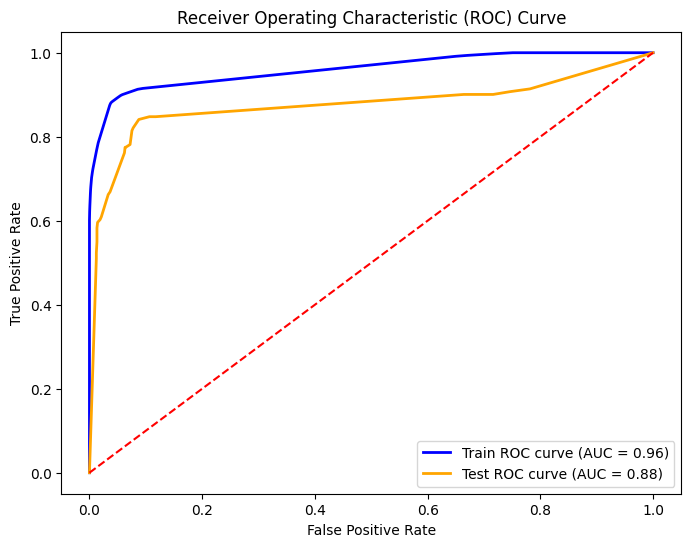

f1_score: <function f1_score at 0x000001B267715E40>
Confusion Matrix:
[[872  30]
 [ 51 100]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       902
           1       0.77      0.66      0.71       151

    accuracy                           0.92      1053
   macro avg       0.86      0.81      0.83      1053
weighted avg       0.92      0.92      0.92      1053

Tiempo de entrenamiento: 0.2595393657684326 segundos


In [12]:
dec_tree,f1_dec_tree=evaluate_model(DecisionTreeClassifier(),X_train,X_test,y_train,y_test)

# Ada Boost

El proceso tardó aproximadamente 0.33 segundos.


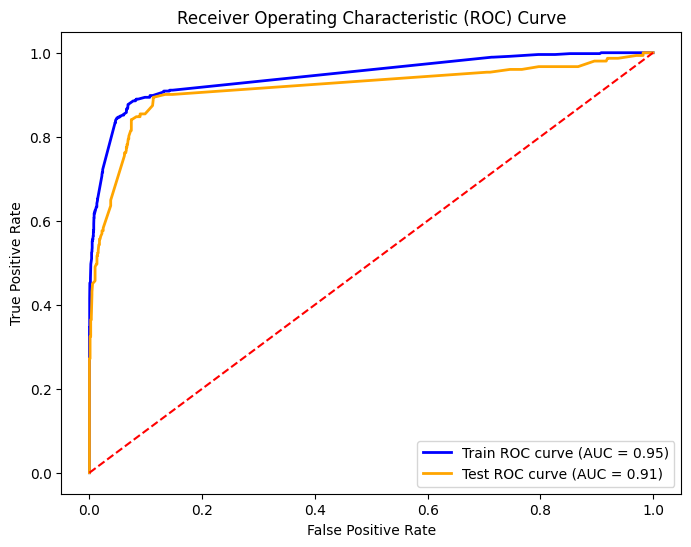

f1_score: <function f1_score at 0x000001B267715E40>
Confusion Matrix:
[[885  17]
 [ 67  84]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       902
           1       0.83      0.56      0.67       151

    accuracy                           0.92      1053
   macro avg       0.88      0.77      0.81      1053
weighted avg       0.92      0.92      0.91      1053

Tiempo de entrenamiento: 0.5190773010253906 segundos


In [13]:
ada_boost,f1_ada_boost=evaluate_model(AdaBoostClassifier(),X_train,X_test,y_train,y_test)

In [14]:
#create a new dataframe of f1 scores
f1_scores = pd.DataFrame({'Model':['Logistic Regression','Random Forest','Support Vector','XGBoost','MultinomialNB','Decision Tree','AdaBoost'],
                          'F1 Score':[f1_log_reg,f1_rand_for,f1_sup_vec,f1_xg_boost,f1_mul_nom,f1_dec_tree,f1_ada_boost]})
#sort the dataframe
f1_scores.sort_values(by='F1 Score',ascending=False,inplace=True)
print(f1_scores)


                 Model  F1 Score
1        Random Forest  0.847153
2       Support Vector  0.845066
3              XGBoost  0.842839
5        Decision Tree  0.833680
4        MultinomialNB  0.821751
0  Logistic Regression  0.819688
6             AdaBoost  0.810680


In [15]:
#create a new dataframe with accuracy scores

accuracy_scores = pd.DataFrame({'Model':['Logistic Regression','Random Forest','Support Vector','XGBoost','MultinomialNB','Decision Tree','AdaBoost']})

#add accuracy scores to the dataframe
accuracy_scores['Accuracy Score'] = [accuracy_score(y_test,log_reg.predict(X_test)),
                                     accuracy_score(y_test,rand_for.predict(X_test)),
                                     accuracy_score(y_test,sup_vec.predict(X_test)),
                                     accuracy_score(y_test,xg_boost.predict(X_test)),
                                     accuracy_score(y_test,mul_nom.predict(X_test)),
                                     accuracy_score(y_test,dec_tree.predict(X_test)),
                                     accuracy_score(y_test,ada_boost.predict(X_test))]
#sort the dataframe
accuracy_scores.sort_values(by='Accuracy Score',ascending=False,inplace=True)
print(accuracy_scores)


                 Model  Accuracy Score
2       Support Vector        0.928775
1        Random Forest        0.927825
3              XGBoost        0.926876
5        Decision Tree        0.923077
0  Logistic Regression        0.921178
6             AdaBoost        0.920228
4        MultinomialNB        0.909782


In [16]:
#create a new dataframe with AUC scores
auc_scores = pd.DataFrame({'Model':['Logistic Regression','Random Forest','Support Vector','XGBoost','MultinomialNB','Decision Tree','AdaBoost']})

#add AUC scores to the dataframe

auc_scores['AUC Score'] = [roc_auc_score(y_test,log_reg.predict_proba(X_test)[:,1]),
                            roc_auc_score(y_test,rand_for.predict_proba(X_test)[:,1]),
                            roc_auc_score(y_test,sup_vec.predict_proba(X_test)[:,1]),
                            roc_auc_score(y_test,xg_boost.predict_proba(X_test)[:,1]),
                            roc_auc_score(y_test,mul_nom.predict_proba(X_test)[:,1]),
                            roc_auc_score(y_test,dec_tree.predict_proba(X_test)[:,1]),
                            roc_auc_score(y_test,ada_boost.predict_proba(X_test)[:,1])]
#sort the dataframe
auc_scores.sort_values(by='AUC Score',ascending=False,inplace=True)
print(auc_scores)


                 Model  AUC Score
3              XGBoost   0.923019
0  Logistic Regression   0.921561
6             AdaBoost   0.914693
1        Random Forest   0.910618
2       Support Vector   0.910556
5        Decision Tree   0.875472
4        MultinomialNB   0.869264


In [17]:
#crate a new dataframe with the f1 scores, accuracy scores and AUC scores and tiempo de entrenamiento
final_scores = pd.DataFrame({'Model':['Logistic Regression','Random Forest','Support Vector','XGBoost','MultinomialNB','Decision Tree','AdaBoost']})

#add f1 scores, accuracy scores and AUC scores to the dataframe
final_scores['F1 Score'] = [f1_log_reg,f1_rand_for,f1_sup_vec,f1_xg_boost,f1_mul_nom,f1_dec_tree,f1_ada_boost]
final_scores['Accuracy Score'] = [accuracy_score(y_test,log_reg.predict(X_test)),
                                     accuracy_score(y_test,rand_for.predict(X_test)),
                                     accuracy_score(y_test,sup_vec.predict(X_test)),
                                     accuracy_score(y_test,xg_boost.predict(X_test)),
                                     accuracy_score(y_test,mul_nom.predict(X_test)),
                                     accuracy_score(y_test,dec_tree.predict(X_test)),
                                     accuracy_score(y_test,ada_boost.predict(X_test))]

final_scores['AUC Score'] = [roc_auc_score(y_test,log_reg.predict_proba(X_test)[:,1]),

                            roc_auc_score(y_test,rand_for.predict_proba(X_test)[:,1]),
                            roc_auc_score(y_test,sup_vec.predict_proba(X_test)[:,1]),
                            roc_auc_score(y_test,xg_boost.predict_proba(X_test)[:,1]),
                            roc_auc_score(y_test,mul_nom.predict_proba(X_test)[:,1]),
                            roc_auc_score(y_test,dec_tree.predict_proba(X_test)[:,1]),
                            roc_auc_score(y_test,ada_boost.predict_proba(X_test)[:,1])]
#sort the dataframe
final_scores.sort_values(by='F1 Score',ascending=False,inplace=True)
print(final_scores)



                 Model  F1 Score  Accuracy Score  AUC Score
1        Random Forest  0.847153        0.927825   0.910618
2       Support Vector  0.845066        0.928775   0.910556
3              XGBoost  0.842839        0.926876   0.923019
5        Decision Tree  0.833680        0.923077   0.875472
4        MultinomialNB  0.821751        0.909782   0.869264
0  Logistic Regression  0.819688        0.921178   0.921561
6             AdaBoost  0.810680        0.920228   0.914693


In [18]:
## Serialize a Model
import pickle
pickle.dump(xg_boost, open("xgb.app.pkl", "wb")) 
print("Saved model to: xgb.app.pkl")


Saved model to: xgb.app.pkl


In [19]:
loaded_model = pickle.load(open("xgb.app.pkl", "rb")) 
print("Loaded model from: xgb.app.dat")

Loaded model from: xgb.app.dat


In [20]:
y_loaded_pred = loaded_model.predict(X_test) 

In [21]:
print(classification_report(y_test,y_loaded_pred)) 

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       902
           1       0.78      0.68      0.73       151

    accuracy                           0.93      1053
   macro avg       0.86      0.82      0.84      1053
weighted avg       0.92      0.93      0.92      1053

